# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [153]:
mean = np.mean(df["temperature"])
std = np.std(df["temperature"])

In [154]:
samples = np.random.normal(mean, std, size=10000)

In [57]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [58]:
x, y = ecdf(df["temperature"])
x_theor, y_theor = ecdf(samples)

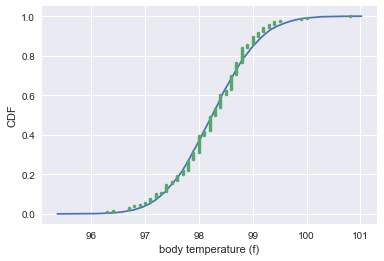

In [60]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("body temperature (f)")
_ = plt.ylabel("CDF")
plt.show()

In [64]:
stats.normaltest(df["temperature"])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## 1. Is the distribution of body temperatures normal? 

The normal CDF overlaid with the data CDF shows promise that the data may be normally distributed. It's very close to the curve, but there are some spots with visible variance. A null hypothesis asserts that the temperature data is distributed normally. SciPy's handy normaltest function, produces a p-value of 0.2587, far too high to reject the null hypothesis. The temperature data therefore is normally distributed.

## 2. Is the sample size large? Are the observations independent? 

As far as the Central Limit Theorem is concerned, the sample size of 130 observations is sufficiently large, as it is above the commonly espoused minimum of 30 samples. The observations can be declared indepedent as well, because one person's temperature does not affect another's. The data is naturally unordered.

## 3. Is the true population mean really 98.6 degrees F?

The temperature data represents one group of 130 individuals. Since it is not being compared to another group, a one-sample test can be used. Since the data has been determined to be normally distributed, both tests are applicable. With a known population standard deviation, large enough sample size, and indepdent observations, a Z-Test is more appropriate.

Null hypothesis asserts that the true population mean is 98.6 degrees F

In [160]:
#determine test statistic
teststat = 98.6 - mean
print("test statistic : " + str(teststat))

#determine standard error using the standard deviation of the sample as the standard deviation of the population
se = std / np.sqrt(130)
print("standard error : " + str(se))

#calculate z-statistic
zstat = teststat / se
print("z-statistic : " + str(zstat))

#determine p-value from normal distribution with given z-statistic without a textbook reference table
pvalue = 2*(1 - stats.norm.cdf(zstat))
print("p-value : " + str(pvalue))

test statistic : 0.35076923076921673
standard error : 0.0640566146952
z-statistic : 5.47592520208
p-value : 4.35231517493e-08


Since the p-value is very small, we reject the null hypothesis that the true population mean is equal to the sample mean of 98.6 degrees.

A one-sample T-Test compares the sample mean with the "known" population mean when the sample size is smaller than 30 and the distribution is normal. SciPy includes built in T-Tests for one-sample and two-sample testing. The one-sample test below is a two-sided test for the null hypothesis that the sample mean is equal to the population mean, 98.6.

In [105]:
stats.ttest_1samp(df["temperature"], 98.6, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The results of the T-Test are similar. The p-value is still very small, so the null hypothesis can still be rejected. The p-value is significantly larger than that of the Z-Test, however, indicating that there is less confidence in the score when using a T-Test, and rightfully so, since it is based on the sample's standard deviation, not the population's.

There are some T-Test formulas for which this data would produce the same results as the Z-Test. That is because the Z-Test above is using the sample standard deviation in lieu of the actual population standard deviation.

## 4. Draw a small sample of size 10 from the data and repeat both tests.

In [152]:
smallsample = np.random.choice(df["temperature"], 10)

smallmean = np.mean(smallsample)
smallstd = np.std(smallsample)

#determine test statistic
smallteststat = 98.6 - smallmean

#determine standard error using the standard deviation of the sample as the standard deviation of the population
smallse = smallstd / np.sqrt(10)

#calculate z-statistic
smallzstat = smallteststat / smallse
print("z-statistic : " + str(zstat))

#determine p-value from normal distribution with given z-statistic without a textbook reference table
smallpvalue = 2*(1 - stats.norm.cdf(smallzstat))
print("p-value : " + str(smallpvalue))

stats.ttest_1samp(smallsample, 98.6, axis=0)

z-statistic : -0.0920964939993
p-value : 0.439255125264


Ttest_1sampResult(statistic=-0.73376067401813916, pvalue=0.48177089368060644)

Now that the sample size is reduced to below the magical, statistical threshold of 30, the T-Test should be more appropriate. Running the test multiple times shows wide variability in the scores and p-values, though the Z-Score is consistently lower than the T-Score. The scores however, are comparable. These results indicate that the proper selection between the T and Z statistics cannot necessarily be made based on the results, and instead need to consider the original requirements for either test to be relevant.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?



 - Start by computing the margin of error and confidence interval. 

## 6. Is there a significant difference between males and females in normal temperature?

 - What test did you use and why?
 - Write a story with your conclusion in the context of the original problem. 


